In [48]:
import json
from pandas import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import igraph as ig
sns.set_theme(context='notebook', style='ticks', font_scale=1.5)

C:\Users\61488\AppData\Local\Temp/ipykernel_20700/1597277836.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## Load and process data

In [49]:
with open('user_info.json', 'r') as read_file:
    user_info = json.load(read_file)

In [50]:
with open('user_repos.json', 'r') as read_file:
    user_repos = json.load(read_file)

## User Information data (user_info)

In [4]:
user_info_df = pd.DataFrame({
    'user': [],
    'bio': [],
    'company': [],
    'created_at': [],
    'total_followers': [],
    'total_following': [],
    'total_repositories': [],
    'most_common_lang': []
})

for user in user_info:
    udata = user_info[user]['data']
    if udata:
        data = udata['user']
        langs = []
        for repo_node in data['repositories']['nodes']:
            primary_language = repo_node['primaryLanguage']
            if primary_language:
                langs.append(primary_language['name'])
        most_common_lang = Counter(langs).most_common(1)
        if len(most_common_lang) > 0:
            most_common_lang = most_common_lang[0][0]
        else:
            most_common_lang = None
        row = [user, data['bio'], data['company'], data['createdAt'], data['followers']['totalCount'], 
               data['following']['totalCount'], data['repositories']['totalCount'], most_common_lang]
        user_info_df.loc[len(user_info_df)] = row
    
user_info_df.head()

,user,bio,company,created_at,total_followers,total_following,total_repositories,most_common_lang
0,jheins3,Mechanical Engineer in-process,None,2013-09-30T21:33:37Z,3.0,10.0,11.0,Python
1,jiahengaa,Wuhan Boy,None,2014-11-06T10:26:36Z,7.0,7.0,60.0,C#
2,jiangilhui0330,None,None,2012-10-06T08:44:58Z,1.0,7.0,48.0,Java
3,jiguorui,Function Energy,Function Energy,2011-12-22T13:42:44Z,0.0,5.0,27.0,C++
4,jill-ockam,None,None,2019-01-23T04:33:59Z,0.0,0.0,0.0,None


In [5]:
print('Table 1. User Information - summary statistics for numerical data')
user_info_df.describe().T

Table 1. User Information - summary statistics for numerical data


,count,mean,std,min,25%,50%,75%,max
total_followers,2087.0,59.960230,441.653011,0.0,2.0,9.0,29.0,16493.0
total_following,2087.0,153.034020,1441.183044,0.0,2.0,12.0,50.0,57242.0
total_repositories,2087.0,113.969813,547.527221,0.0,8.0,25.0,68.0,13269.0


In [15]:
user_info_df.shape

(2087, 8)

In [6]:
user_info_df[user_info_df['total_followers']==16493.0]

,user,bio,company,created_at,total_followers,total_following,total_repositories,most_common_lang
1456,developedbyed,Developer/Youtuber/Designer,None,2017-08-17T18:54:11Z,16493.0,2.0,65.0,JavaScript


In [7]:
user_info_df[user_info_df['total_following']==57242.0]

,user,bio,company,created_at,total_followers,total_following,total_repositories,most_common_lang
1252,batermj,Software Engineer with A Passion for Innovatio...,META4ALL,2010-04-23T03:23:12Z,1415.0,57242.0,2380.0,C++


In [8]:
user_info_df[user_info_df['total_repositories']==13269.0]

,user,bio,company,created_at,total_followers,total_following,total_repositories,most_common_lang
1215,asdlei99,,None,2013-08-14T14:47:36Z,43.0,333.0,13269.0,C++


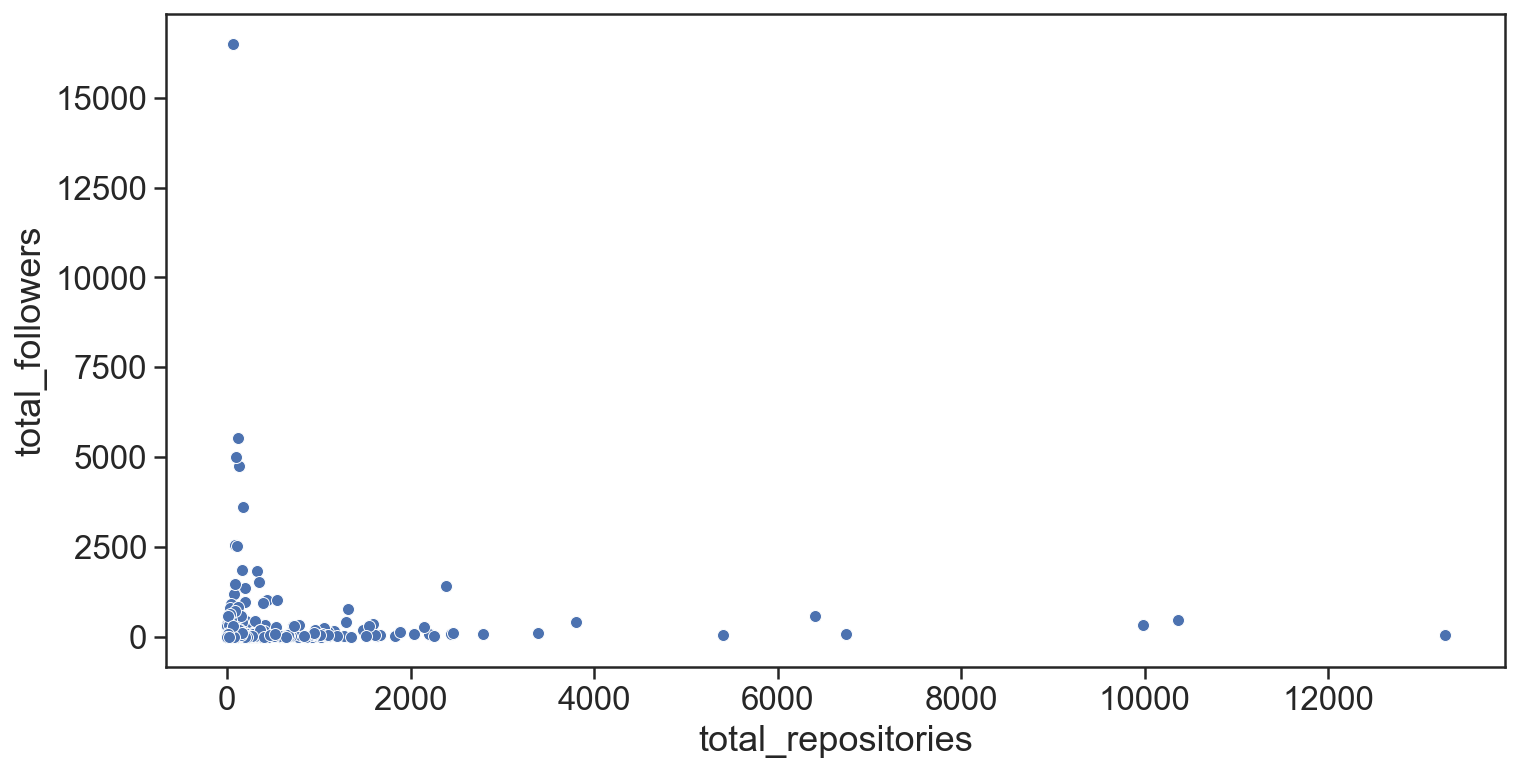

In [9]:
# sns.boxplot(x=user_info_df['total_followers']) 
# sns.boxplot(x=user_info_df['total_following']) 
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=user_info_df, x='total_repositories', y='total_followers') 
plt.show()
             
#              stat='percent',discrete=True, bins=200, binwidth=500) 

In [10]:
# fig, ax = plt.subplots(figsize=(14, 6))
# sns.scatterplot(data=user_info_df, x='total_following', y='total_followers', hue='total_repositories') 
# plt.xlabel('Total repositories followed by user')
# plt.ylabel('Total followers per repository')
# plt.title('Figure 1. User information – number of repositories per user, number of followers, and number of repostories followed', loc='left')
# plt.legend(title='Total repositories per user')
# plt.show()

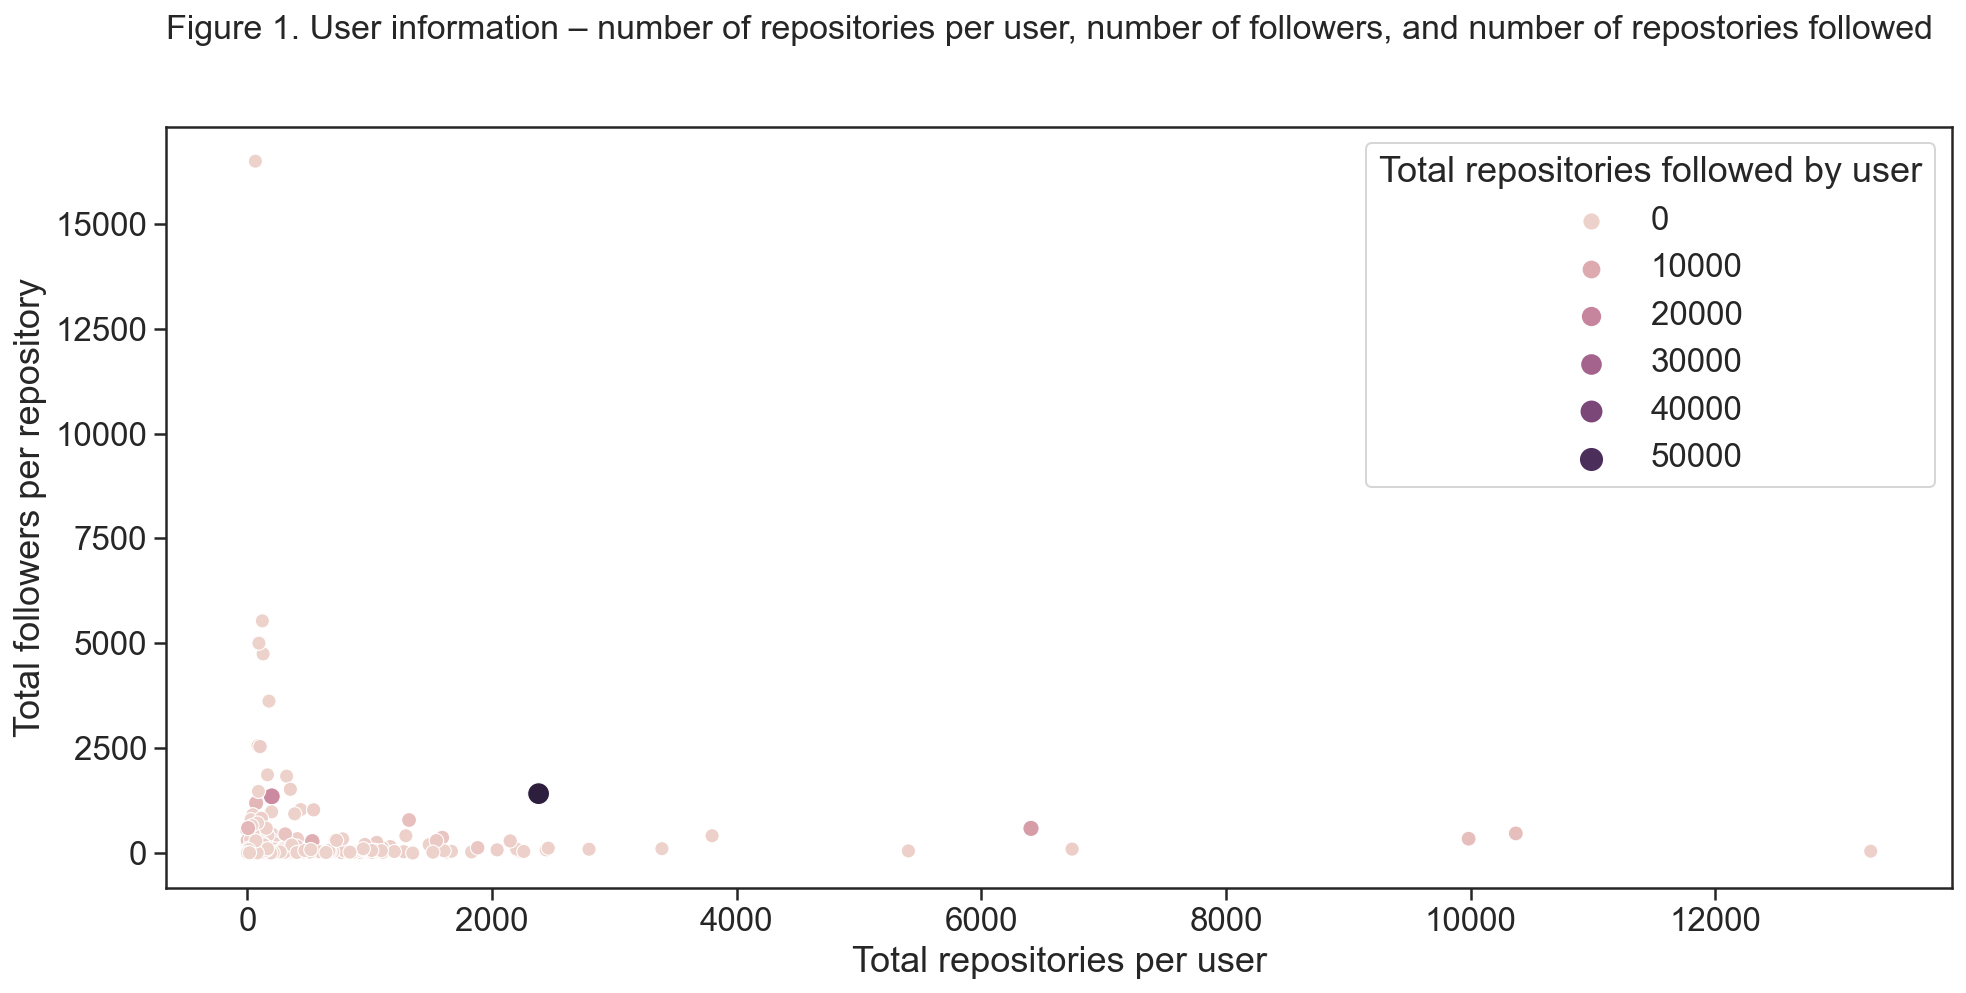

In [12]:
# For report 
fig, ax = plt.subplots(figsize=(16, 7))
sns.scatterplot(data=user_info_df, x='total_repositories', y='total_followers', hue='total_following', 
                size='total_following', sizes=(50, 120))
plt.xlabel('Total repositories per user')
plt.ylabel('Total followers per repository')
plt.title('Figure 1. User information – number of repositories per user, number of followers, and number of repostories followed', size=17, y=1.10, loc='left')
plt.legend(title='Total repositories followed by user')
# sns.despine()
plt.show()

In [13]:
# Plot with small marker size
# plt.plot( 'total_repositories', 'total_followers', "", data=user_info_df, marker='o', markersize=0.7)
# plt.xlabel('Total repositories')
# plt.ylabel('Total Followers')
# plt.title('Figure 123. TBC ---', loc='left')
# plt.show()

In [14]:
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.stripplot(data=user_info_df, x='total_repositories', y='total_followers', jitter=0.5)
# plt.show()

### User information -  programming languages used

In [15]:
temp = user_info_df.drop(columns='created_at').describe(include=['object'])

In [16]:
# temp = temp.drop(columns='user')
print('Table 2. GitHub users – counts of biography, company and most common programming  language used')
temp

Table 2. GitHub users – counts of biography, company and most common programming  language used


,user,bio,company,most_common_lang
count,2087,1409,649,1951
unique,2087,639,601,66
top,jheins3,,Microsoft,JavaScript
freq,1,759,12,446


In [19]:
user_info_df['most_common_lang'].value_counts()

JavaScript    446
Python        299
Java          192
C++           149
Ruby          120
             ... 
AutoHotkey      1
Haxe            1
Vue             1
Verilog         1
ASP             1
Name: most_common_lang, Length: 66, dtype: int64

In [191]:
user_info_df['most_common_lang'].value_counts().head(20)

JavaScript          446
Python              299
Java                192
C++                 149
Ruby                120
C                   102
PHP                  97
C#                   88
HTML                 61
Shell                52
Go                   50
Objective-C          42
Jupyter Notebook     42
CSS                  28
Swift                24
Rust                 19
TypeScript           17
Erlang               12
Vim Script           10
Scala                 8
Name: most_common_lang, dtype: int64

In [211]:
user_info_df['company'].value_counts(dropna=False).head(40)

NaN                                              1438
Microsoft                                          12
GitHub                                             10
CWI                                                 4
Alibaba                                             4
MIPT                                                4
Ockam                                               4
@novuhq                                             3
None                                                3
Ghost Foundation                                    2
ThoughtWorks                                        2
GoVanguard                                          2
Go1                                                 2
@turbot                                             2
Nitro                                               2
Vercel                                              2
@tooljet                                            2
china                                               2
Peking University           

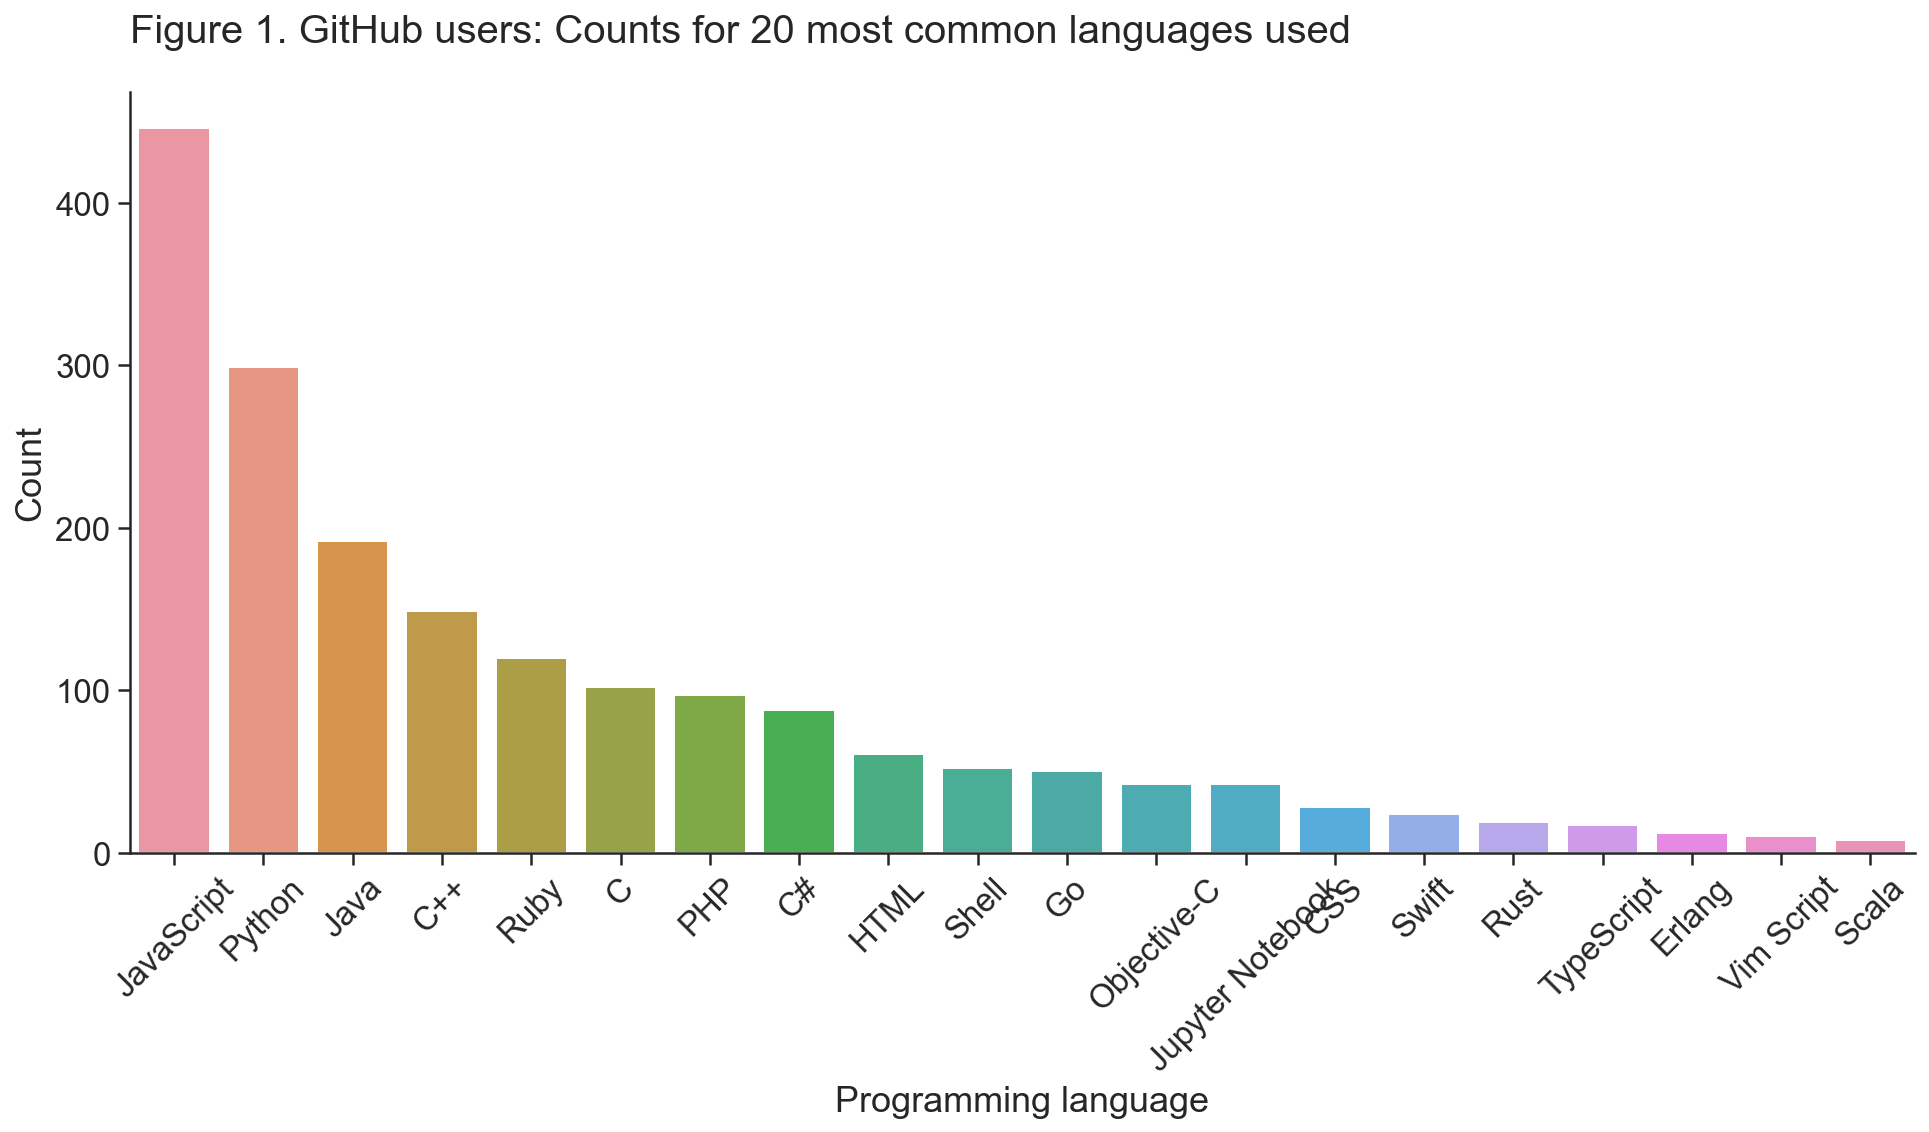

In [66]:
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot(x='most_common_lang', data=user_info_df, 
              order=user_info_df['most_common_lang'].value_counts().iloc[:20].index)
plt.xlabel('Programming language', size=18)
plt.ylabel('Count', size=18)
plt.title('Figure 1. GitHub users: Counts for 20 most common languages used', size=20,  y=1.05, loc='left')
plt.xticks(rotation=45)
sns.despine()
plt.show()

In [23]:
langs = []
for repo_node in user_info['jheins3']['data']['user']['repositories']['nodes']:
    primary_language = repo_node['primaryLanguage']
    if primary_language:
        langs.append(primary_language['name'])
print(Counter(langs).most_common(1))

[('Python', 3)]


## Repository Information data (user_repos)

In [51]:
for user in list(user_repos.items())[:50]:
    print(user[0], user[1]['data']['user']['starredRepositories']['totalCount'])

01885326842 1
0x00evil 1441
0xWDG 240
1016135097 25
11ph22il 497
1blackbar 0
1pete 77
1suming 413
21113048 0
3576892 0
4nmt 57
5118Python 64
820239854 426
85pando 15
9561-22 1
9l 130
AEdmunds 6
AHPanna 1004
AI-Guru 49
AMaleche 95
ANMinaev 17
ARoiD 8688
AUTOMATIC1111 4
Aashu-Dubey 0
AbstractiveNord 8
Accordingtomark 1382
Achrine 457
Adawodu 1
AexChecker 103
AgIt0 125
Aha-run 1097
Aiden128 101
AirShark 185
Aishou 1486
AlainAlvarez 22
Alexander-Wilms 345
AlexanderVladimirov9090 7
AliRafati 1
Althuiser 96
AnasMostefaoui 530
AndrewOrr 13
AndyGaskell 387
AnemoneMoon 267
Aniw777 28
AnotherCoolDude 315
AnthonyByansi 6
AntonioAscue 2
Apology11 6
Arihntjain 136
ArryMatt 44


In [52]:
user_repos_dict = {}
data = []
for i in user_repos:
    temp = {}
    temp['Total Starred'] = user_repos[i]['data']['user']['starredRepositories']['totalCount']
    temp['StarredRepos'] = []
    row = []
    row.append(i)
    row.append(temp['Total Starred'] )
    for node in user_repos[i]['data']['user']['starredRepositories']['nodes']:
        temp['StarredRepos'].append(node['nameWithOwner'])

    row.append(temp['StarredRepos'])
    data.append(row)
    user_repos_dict[i] = temp

In [53]:
temp['Total Starred']

325

In [54]:
temp['StarredRepos']

['JakeWharton/ActionBarSherlock',
 'castorflex/FlipImageView',
 'takimafr/androidkickstartr',
 'nostra13/Android-Universal-Image-Loader',
 'keyboardsurfer/Crouton',
 'square/dagger',
 'square/retrofit',
 'square/android-times-square',
 'ragunathjawahar/instant-adapter',
 'chrisbanes/Android-BitmapCache',
 'Hanul/UJS',
 'dotnet/corefx',
 'dotnet-foundation/foundation',
 'ricardojmendez/LibNoise.Unity',
 'strongloop/loopback',
 'google/seesaw',
 'bayandin/awesome-awesomeness',
 'fffaraz/awesome-cpp',
 'avelino/awesome-go',
 'akullpp/awesome-java',
 'commaai/research',
 'commaai/neo',
 'commaai/openpilot',
 'loom/loom',
 'nhn/socket.io-client-unity3d',
 'Cysharp/MagicOnion',
 'cockroachdb/cockroach',
 'line/armeria',
 'realm/realm-dotnet',
 'grpc/grpc',
 'couchbase/couchbase-lite-net',
 'BBuzzArt/react-native-infinite',
 'openfaas/faas',
 'apache/openwhisk',
 'sschmid/Entitas',
 'scouter-project/scouter',
 'MrSyee/pg-is-all-you-need',
 'tensorflow/adanet',
 'GetFirefly/firefly',
 'IDSIA/s

In [55]:
df = pd.DataFrame({'User': [],
                   'Repos': [],
                   'Rating': []})

In [56]:
for key, val in user_repos_dict.items():
    for repo in val['StarredRepos']:
        row = []
        df2 = pd.DataFrame({'User': [key],
                    'Repos': [repo],
                    'Rating': [1]})
        df = df.append(df2, ignore_index = True)

In [59]:
user_repos_df = df
user_repos_df.head()

,User,Repos,Rating
0,01885326842,novuhq/novu,1.0
1,0x00evil,atom/atom,1.0
2,0x00evil,greatfire/wiki,1.0
3,0x00evil,rails-sqlserver/activerecord-sqlserver-adapter,1.0
4,0x00evil,OpenRA/OpenRA,1.0


In [78]:
user_repos_df.head()

,User,Repos,Rating
0,01885326842,novuhq/novu,1.0
1,0x00evil,atom/atom,1.0
2,0x00evil,greatfire/wiki,1.0
3,0x00evil,rails-sqlserver/activerecord-sqlserver-adapter,1.0
4,0x00evil,OpenRA/OpenRA,1.0


In [62]:
print(user_repos_df['User'].unique().shape)
user_repos_df['Repos'].unique().shape

(1977,)


(76973,)

In [64]:
user_repos_df['User'].describe()

count       126622
unique        1977
top       zzragida
freq           100
Name: User, dtype: object

In [65]:
user_repos_df['Repos'].describe()

count             126622
unique             76973
top       twbs/bootstrap
freq                 190
Name: Repos, dtype: object

<AxesSubplot:>

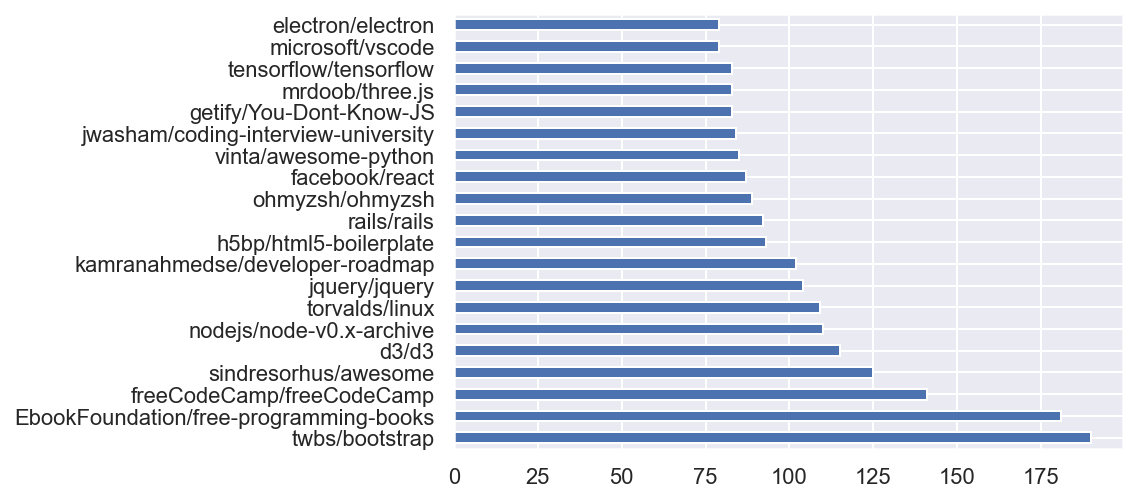

In [71]:
user_repos_df['Repos'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

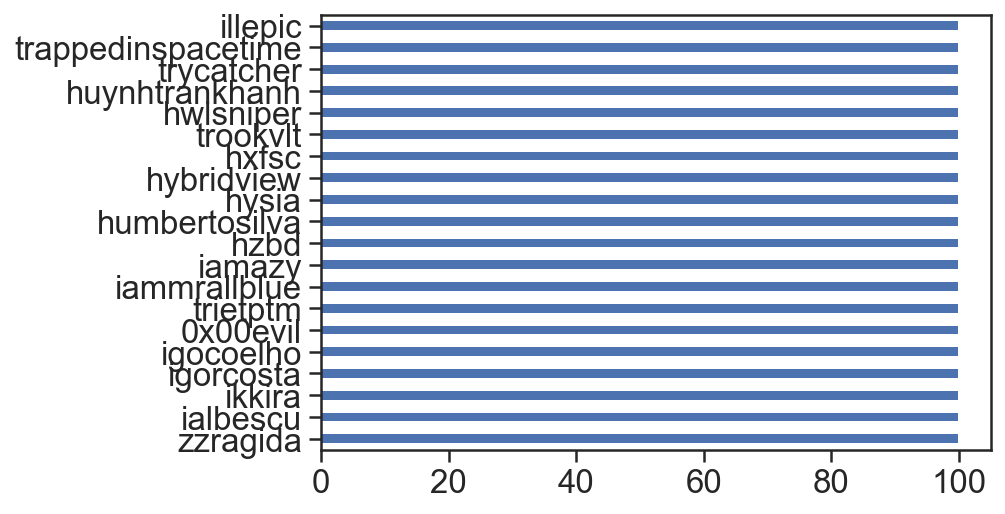

In [66]:
 user_repos_df['User'].value_counts()[:20].plot(kind='barh')

In [72]:
# sns.set(font_scale=1)
# fig, ax = plt.subplots(figsize=(16, 6))
# sns.countplot(x='Repos', data=user_repos_df,
#             order=df.Repos.value_counts().iloc[:20].index)
# plt.xticks(rotation=90)
# sns.despine()
# plt.show()

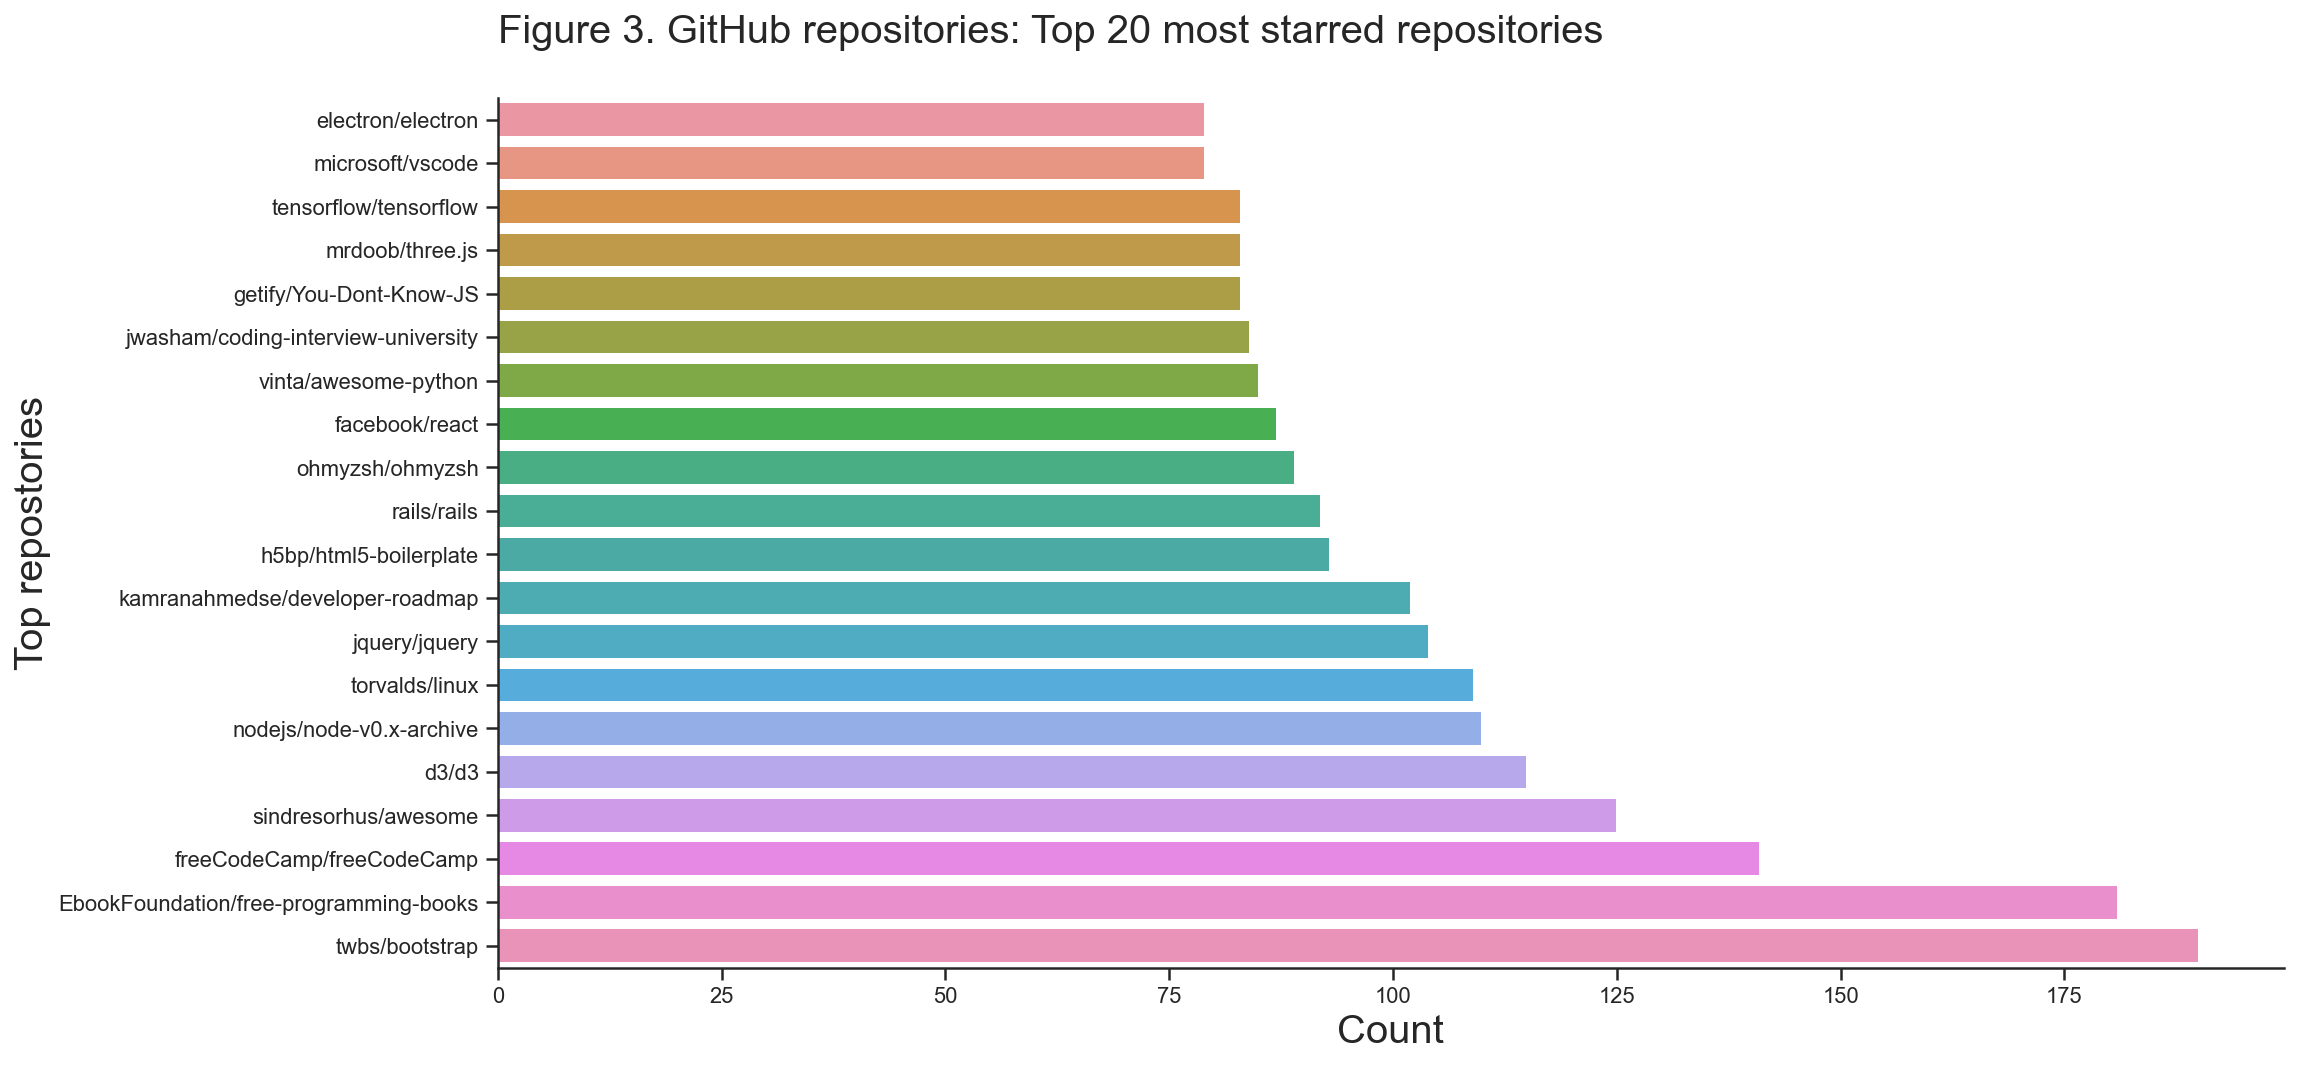

In [70]:
# Plot top 20 most starred repositories
with sns.axes_style('ticks'):
    ax = plt.subplots(figsize=(16, 8))
sns.countplot(y='Repos', data=user_repos_df,
            order=df.Repos.value_counts().iloc[:20].index[::-1])
plt.xlabel('Count', size=20)
plt.ylabel('Top repostories', size=20)
plt.title('Figure 3. GitHub repositories: Top 20 most starred repositories', size=20, y=1.05, loc='left')
sns.despine()
plt.show()